# difFUBAR

difFUBAR is an approximate Bayesian analysis of adaptive evolution. For each codon site, difFUBAR compares $\omega$, the non-synonymous to synonymous substitution rate ratio ($\beta/\alpha$, or $dN/dS$) between two predefined clades on a phylogeny.

## You need:

- A **codon** multiple sequence alignment, in `.fasta` format.
- A [Newick](https://en.wikipedia.org/wiki/Newick_format) phylogeny (typically estimated from the alignment) where the taxon names match the alignment, and where nodes have been tagged (eg. `taxon_name{G1}` in the phylogeny string).
 - There must be two different tags, which define the groups to be compared, and any untagged branches will not participate in the comparison.

## Tips:
- You can upload your tree to our [phylogeny tagging utility](https://murrellgroup.github.io/WebWidgets/phylotagger.html) to label clades.
- Try and avoid potentially problematic characters (space, colon, semicolon, brackets, etc) in your sequence names (clean these up before you construct the phylogeny to make sure the names match).
- Visually inspect your alignments, both as nucleotide sequences and as their translations (we like [AliView](https://ormbunkar.se/aliview/)).
- Package installation and precompilation takes some time on Colab.
 - **If you instead install and run Julia locally, you only ever need to do this once!**
 - Go [here](https://julialang.org/install/) for instructions on how to install Julia


This notebook will run with demo files. If you wish to analyze your own files, upload them using the Colab files menu on the left: image.png
→
image.png

In [ ]:
#Install and load packages: (this can take some time the first time on Colab)
using Pkg
Pkg.add("Suppressor") #Suppressor, with @suppress and @suppress_err macros are just to prevent long outputs from clogging up the notebook example - you don't really need them.
using Suppressor
@suppress Pkg.rm(["Lux","Reactant"])
@suppress Pkg.add(["MolecularEvolution", "FASTX", "Plots", "Phylo"])
@suppress Pkg.add(url = "https://github.com/MurrellGroup/CodonMolecularEvolution.jl")
using MolecularEvolution, FASTX, CodonMolecularEvolution
using Plots, Phylo #<- these are optional, enabling viz when loaded

In [ ]:
#Fetch the demo multiple sequence alignment, and tagged phylogeny:
@suppress run(`wget https://raw.githubusercontent.com/MurrellGroup/CodonMolecularEvolution.jl/refs/heads/main/docs/src/H5_subsampled.fasta`);
@suppress run(`wget https://raw.githubusercontent.com/MurrellGroup/CodonMolecularEvolution.jl/refs/heads/main/docs/src/H5_subsampled_tagged.tre`);
("H5_subsampled.fasta" in readdir() && "H5_subsampled_tagged.tre" in readdir()) && println("Files fetched!")

In [3]:
#Run the analysis:
seqnames,seqs = read_fasta("H5_subsampled.fasta"); #<- Reads in fasta alignment
treestring = readlines(open("H5_subsampled_tagged.tre"))[1]; #<- Reads in phylogeny (as a string)
df, results, plots = difFUBAR(seqnames, seqs, treestring, ["{G1}", "{G2}"], "difFUBAR_H5_subsampled"); #<- Runs difFUBAR (note: the ["{G1}", "{G2}"] must match whatever tags you have on your tree)

Step 1: Initialization. If exports = true, tree showing the assignment of branches to groups/colors will be exported to: difFUBAR_H5_subsampled_tagged_input_tree.svg.
Step 2: Optimizing global codon model parameters.
Optimized single α,β LL=-61147.43019454108 with α=2.4528778755382867 and β=0.42151196711816985.
Step 3: Calculating grid of 1728-by-570 conditional likelihood values (the slowest step). Currently on:
0.0% 29.0% 58.0% 87.0% 
Step 4: Running Gibbs sampler to infer site categories.
Step 5: Tabulating and plotting. Detected sites:
Site 10 - P(ω1 > ω2):0.0; P(ω2 > ω1):0.984; P(ω1 > 1):0.004; P(ω2 > 1):0.2805
Site 11 - P(ω1 > ω2):0.0; P(ω2 > ω1):0.997; P(ω1 > 1):0.219; P(ω2 > 1):0.998
Site 12 - P(ω1 > ω2):0.001; P(ω2 > ω1):0.953; P(ω1 > 1):0.0005; P(ω2 > 1):0.214
Site 32 - P(ω1 > ω2):0.9595; P(ω2 > ω1):0.002; P(ω1 > 1):0.006; P(ω2 > 1):0.0
Site 112 - P(ω1 > ω2):0.9975; P(ω2 > ω1):0.0; P(ω1 > 1):0.0075; P(ω2 > 1):0.0
Site 128 - P(ω1 > ω2):0.9795; P(ω2 > ω1):0.0005; P(ω1 > 1):0.01

## Note: You can now download the analysis outputs, plots, etc, in the left panel: image.png

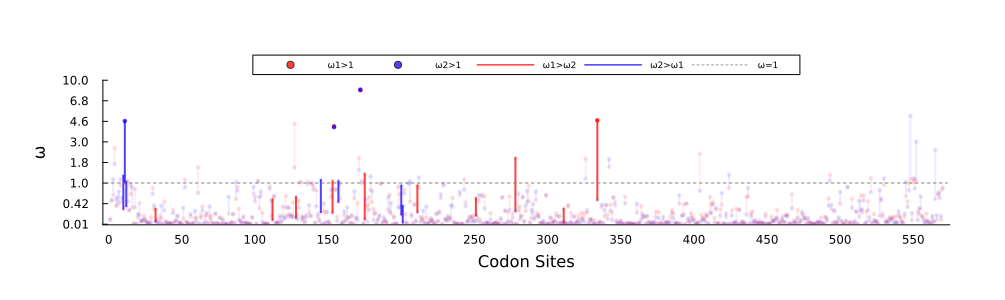

In [11]:
#A plot showing posterior means, and detections above posterior thresholds, for all sites:
plots[6]

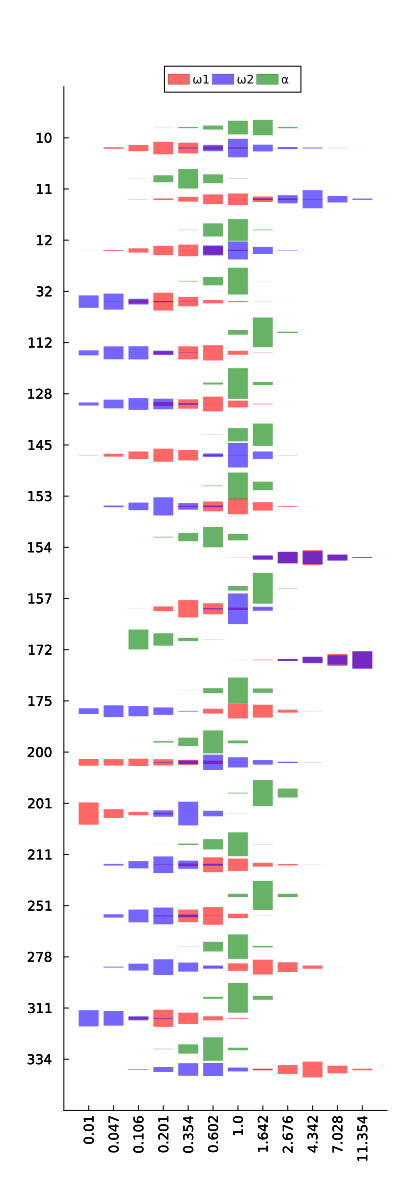

In [8]:
#Showing posterior marginal distributions for alpha and both betas
#Parameter value on the x axis, and codon sites on the y axis
plots[4]

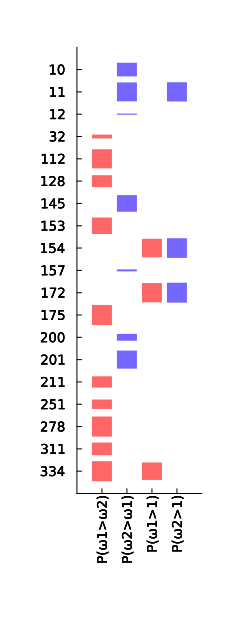

In [9]:
#Showing posterior probabilities above threhold for all four hypotheses.
#Hypotheses on the x axis, codon sites (with any of the four above posterior threshold) on the y axis
plots[5]

In [13]:
|#Retabulate, plot, etc processed data with a different posterior threshold (we'll make this simpler):
newdf, newplots = difFUBAR_tabulate_and_plot("difFUBAR_H5_subsampled_0.85", 0.85, results...);

Step 5: Tabulating and plotting. Detected sites:
Site 10 - P(ω1 > ω2):0.0; P(ω2 > ω1):0.984; P(ω1 > 1):0.004; P(ω2 > 1):0.2805
Site 11 - P(ω1 > ω2):0.0; P(ω2 > ω1):0.997; P(ω1 > 1):0.219; P(ω2 > 1):0.998
Site 12 - P(ω1 > ω2):0.001; P(ω2 > ω1):0.953; P(ω1 > 1):0.0005; P(ω2 > 1):0.214
Site 16 - P(ω1 > ω2):0.013; P(ω2 > ω1):0.8865; P(ω1 > 1):0.012; P(ω2 > 1):0.1235
Site 18 - P(ω1 > ω2):0.88; P(ω2 > ω1):0.011; P(ω1 > 1):0.0855; P(ω2 > 1):0.0
Site 32 - P(ω1 > ω2):0.9595; P(ω2 > ω1):0.002; P(ω1 > 1):0.006; P(ω2 > 1):0.0
Site 51 - P(ω1 > ω2):0.0125; P(ω2 > ω1):0.8625; P(ω1 > 1):0.0; P(ω2 > 1):0.0005
Site 69 - P(ω1 > ω2):0.019; P(ω2 > ω1):0.858; P(ω1 > 1):0.0; P(ω2 > 1):0.0
Site 87 - P(ω1 > ω2):0.0115; P(ω2 > ω1):0.858; P(ω1 > 1):0.009; P(ω2 > 1):0.174
Site 89 - P(ω1 > ω2):0.9195; P(ω2 > ω1):0.006; P(ω1 > 1):0.0005; P(ω2 > 1):0.0
Site 105 - P(ω1 > ω2):0.8755; P(ω2 > ω1):0.01; P(ω1 > 1):0.001; P(ω2 > 1):0.0
Site 111 - P(ω1 > ω2):0.0065; P(ω2 > ω1):0.9035; P(ω1 > 1):0.0; P(ω2 > 1):0.01
Site 112 

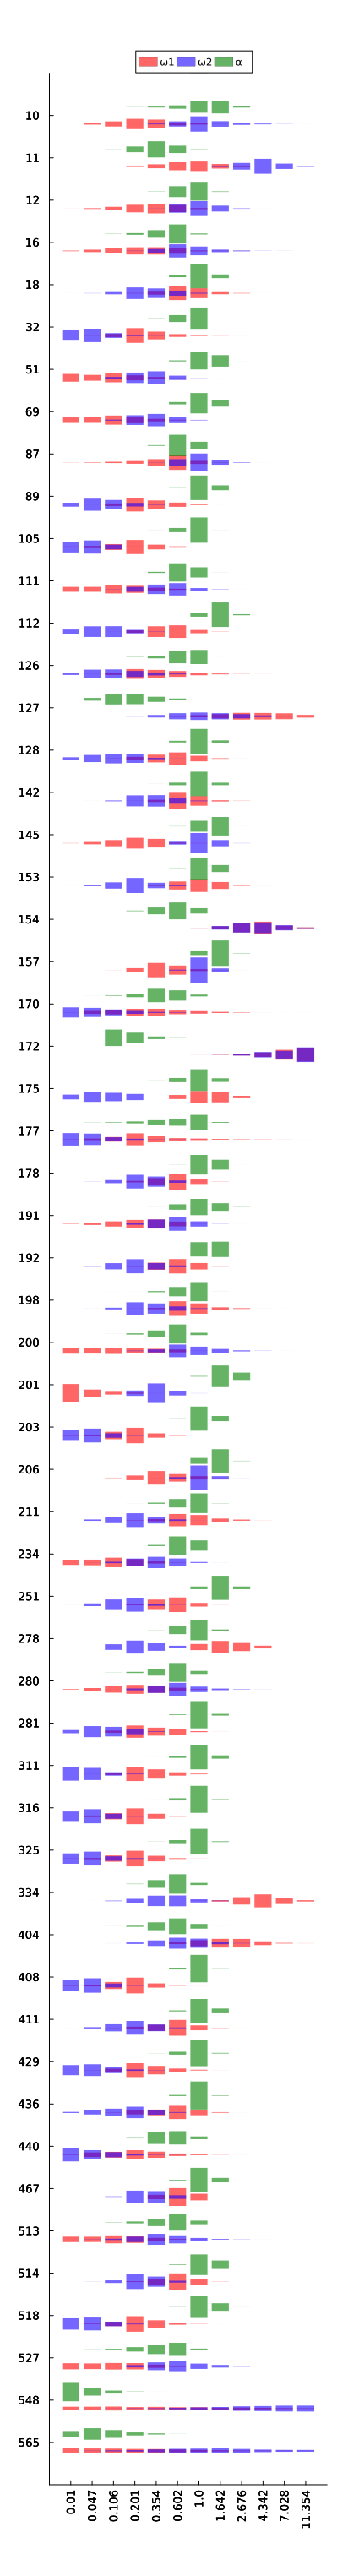

In [16]:
#With a lower threshold, there are many more sites detected:
newplots[3]

<embed src="difFUBAR_H5_subsampled_tagged_input_tree.svg" type="image/svg+xml" />